In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [65]:
data = np.load("/content/drive/MyDrive/ml1/train.npy", allow_pickle=True)
data = data.item()
data_input = data['input']

In [66]:
labels = data['label']

In [67]:
data_input

array([[[[-2.8890e+00],
         [-7.9550e+00],
         [-1.6170e+00],
         ...,
         [ 1.9430e+00],
         [-3.0920e+00],
         [-1.7090e+00]],

        [[-3.3770e+00],
         [-8.9310e+00],
         [-1.6170e+00],
         ...,
         [ 2.9200e+00],
         [-3.0920e+00],
         [ 2.4400e-01]],

        [[-3.3770e+00],
         [-8.9310e+00],
         [-1.5300e-01],
         ...,
         [ 3.4080e+00],
         [-3.0920e+00],
         [ 2.1970e+00]],

        ...,

        [[ 5.9000e+00],
         [ 3.7640e+00],
         [-8.9420e+00],
         ...,
         [-1.0000e-02],
         [ 5.2080e+00],
         [-1.9775e+01]],

        [[ 5.4120e+00],
         [ 3.2760e+00],
         [-1.0895e+01],
         ...,
         [-1.0000e-02],
         [ 5.2080e+00],
         [-2.1240e+01]],

        [[ 5.9000e+00],
         [ 2.7870e+00],
         [-1.1383e+01],
         ...,
         [-1.0000e-02],
         [ 5.6970e+00],
         [-2.2217e+01]]],


       [[[-3.8660e+00],


In [68]:
labels.shape

(1080,)

# 전처리


In [69]:
labels = data['label']
labels.shape
repeated_arr = []
for i in range(len(labels)):
    repeated_arr.extend(np.full(64, labels[i]))

labels_1 = np.array(repeated_arr)
labels_1





array([1., 1., 1., ..., 0., 0., 0.])

In [70]:
labels_1.shape

(69120,)

In [71]:
input_T = []
for i in range(1080):
    data_input_m = data_input[i][:][:].squeeze().T
    input_T.append(data_input_m)

input_T = np.array(input_T)
input_T.shape

(1080, 64, 256)

In [72]:
def fft(eeg_signal, sampling_rate):
    """
    주어진 EEG 신호에 대한 FFT를 계산하고 주파수 및 해당 주파수 성분의 파워를 시각화합니다.

    :param eeg_signal: EEG 신호 (1차원 numpy 배열)
    :param sampling_rate: 샘플링 주파수 (Hz)
    """
    n = len(eeg_signal)
    T = 1 / sampling_rate
    yf = np.fft.fft(eeg_signal)
    xf = np.fft.fftfreq(n, T)[:n//2]
    yf = 2.0/n * np.abs(yf[:n//2])
    return yf

In [77]:
len(fft(input_T[0][0],256))

128

In [78]:
FFT = []

for i in  range(1080):
    for s in range(64):
        FFT.append(fft(input_T[i][s], 256))

In [80]:
FFT = np.array(FFT)
FFT.shape

(69120, 128)

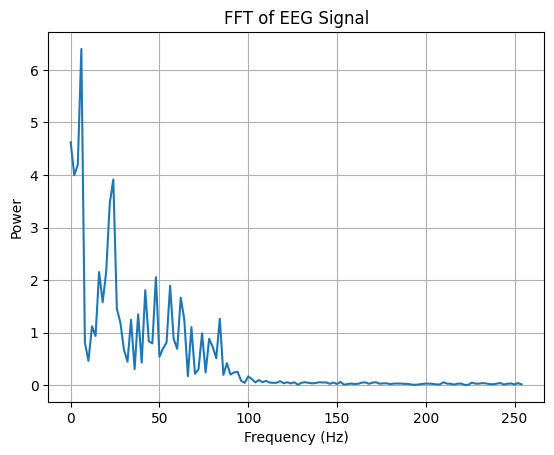

array([4.62085938, 3.99636612, 4.19455065, 6.39716753, 0.81118259,
       0.46534749, 1.12135233, 0.93711394, 2.15366918, 1.58015318,
       2.16092336, 3.45740178, 3.91408071, 1.45603986, 1.18890703,
       0.67371108, 0.45073912, 1.24557915, 0.30602135, 1.34942115,
       0.43170319, 1.80923509, 0.83870513, 0.79628902, 2.05633659,
       0.54083786, 0.70049107, 0.81305656, 1.89316285, 0.88217712,
       0.69184424, 1.66592983, 1.24410149, 0.17369564, 1.10645221,
       0.21786382, 0.30431586, 0.9877701 , 0.24470316, 0.88453317,
       0.73018449, 0.5141182 , 1.26504391, 0.19684328, 0.42077354,
       0.20329249, 0.24426956, 0.25662442, 0.0856791 , 0.04632063,
       0.16922712, 0.11823952, 0.05442651, 0.10065391, 0.05839291,
       0.08373517, 0.05224769, 0.04681135, 0.04731246, 0.07742593,
       0.0384973 , 0.05716735, 0.03572317, 0.05674692, 0.01077234,
       0.04866596, 0.05766203, 0.04641183, 0.03720151, 0.04314641,
       0.05830555, 0.05266987, 0.05318226, 0.02783451, 0.05182

In [ ]:
def plot_fft(eeg_signal, sampling_rate):
    """
    주어진 EEG 신호에 대한 FFT를 계산하고 주파수 및 해당 주파수 성분의 파워를 시각화합니다.

    :param eeg_signal: EEG 신호 (1차원 numpy 배열)
    :param sampling_rate: 샘플링 주파수 (Hz)
    """
    n = len(eeg_signal)
    T = 1 / sampling_rate
    yf = np.fft.fft(eeg_signal)
    xf = np.fft.fftfreq(n, T)[:n//2]
    yf = 2.0/n * np.abs(yf[:n//2])

    plt.plot(xf, yf)
    plt.title('FFT of EEG Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid()
    plt.show()
    return yf
# 예시 EEG 신호 (임의의 데이터)

plot_fft(input_T[20][0], 512)

In [ ]:
input_T

In [ ]:
data_input_0 = input_T.reshape(1080*64,256)
df = pd.DataFrame(data_input_0)
data_input_0.shape

(69120, 256)

In [ ]:
69120-66270

2850

In [84]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(data_input_0,labels_1 , test_size=0.2, random_state=156)

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

----

In [83]:
X_train, X_test, y_train, y_test = train_test_split(FFT,labels_1 , test_size=0.2, random_state=156)



xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, w_preds)
print("Accuracy:", accuracy)

Accuracy: 0.7364004629629629


#*TEST 파일 load 및 csv export*#


In [86]:
data_test = np.load("/content/drive/MyDrive/ml1/test.npy", allow_pickle=True)
data_test = data_test.item()
data_input_test = data_test['input']

In [92]:
input_test_T = []
for i in range(120):
    data_input_m = data_input_test[i][:][:].squeeze().T
    input_test_T.append(data_input_m)

input_test_T = np.array(input_test_T)
input_test_T.shape

(120, 64, 256)

In [93]:
FFT_test = []

for i in  range(120):
    for s in range(64):
        FFT_test.append(fft(input_test_T[i][s], 256))

FFT_test = np.array(FFT_test)
FFT_test.shape

(7680, 128)

In [94]:
y_pred = xgb_wrapper.predict(FFT_test)

In [95]:
y_pred.mean()

0.555859375

In [97]:
csv = list(y_pred)

array([1., 1., 1., ..., 0., 0., 0.])

In [98]:
len(csv)

7680

In [119]:
answer = []

for i in range(120):
    pred = []
    for s in range(64):
        pred.append(csv[i*64+s])
    if sum(pred)/len(pred) > 0.58:
        answer.append(1)
    else:
        answer.append(0)

len(answer)

120

In [120]:
test_pred = np.array(answer)

In [121]:
test_pred.mean()

0.5

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df = pd.DataFrame(answer)

In [124]:
df

,0
0,1
1,1
2,1
3,1
4,1
...,...
115,0
116,0
117,0
118,0


In [125]:
df.to_csv('submission_14.csv',index = True)